# LSA

## 전처리

In [1]:
import wget
wget.download('https://github.com/euphoris/datasets/raw/master/neurips.zip')

100% [..........................................................................] 1357662 / 1357662

'neurips (5).zip'

In [2]:
import pandas as pd
df = pd.read_csv('neurips.zip')
df.head()

,year,title,abstract
0,2007,Competition Adds Complexity,It is known that determinining whether a DEC-P...
1,2007,Efficient Principled Learning of Thin Junction...,We present the first truly polynomial algorith...
2,2007,Regularized Boost for Semi-Supervised Learning,Semi-supervised inductive learning concerns ho...
3,2007,Simplified Rules and Theoretical Analysis for ...,We show that under suitable assumptions (prima...
4,2007,Predicting human gaze using low-level saliency...,"Under natural viewing conditions, human observ..."


In [3]:
df.tail()

,year,title,abstract
3915,2017,"On Separability of Loss Functions, and Revisit...",We revisit the classical analysis of generativ...
3916,2017,Maxing and Ranking with Few Assumptions,PAC maximum ...
3917,2017,On clustering network-valued data,"Community detection, which focuses on clusteri..."
3918,2017,A General Framework for Robust Interactive Lea...,We propose a general framework for interactive...
3919,2017,Multi-view Matrix Factorization for Linear Dyn...,We consider maximum likelihood estimation of l...


In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = TfidfVectorizer(stop_words='english', max_features=2000)

In [5]:
cv

TfidfVectorizer(max_features=2000, stop_words='english')

In [6]:
x = cv.fit_transform(df.abstract)
x

<3920x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 216854 stored elements in Compressed Sparse Row format>

In [7]:
words = cv.get_feature_names()
words

['000',
 '10',
 '100',
 '20',
 '2d',
 '3d',
 'ability',
 'able',
 'absolute',
 'abstract',
 'accelerated',
 'access',
 'according',
 'account',
 'accounts',
 'accuracy',
 'accurate',
 'accurately',
 'achieve',
 'achieved',
 'achieves',
 'achieving',
 'action',
 'actions',
 'activation',
 'activations',
 'active',
 'activities',
 'activity',
 'actor',
 'actually',
 'ad',
 'adapt',
 'adaptation',
 'adapted',
 'adaptive',
 'adaptively',
 'addition',
 'additional',
 'additionally',
 'additive',
 'address',
 'addressed',
 'addresses',
 'admits',
 'admm',
 'advances',
 'advantage',
 'advantages',
 'adversarial',
 'adversary',
 'affine',
 'affinity',
 'agent',
 'agents',
 'aggregation',
 'agnostic',
 'aim',
 'aims',
 'al',
 'algorithm',
 'algorithmic',
 'algorithms',
 'alignment',
 'allocation',
 'allow',
 'allowed',
 'allowing',
 'allows',
 'alpha',
 'alternating',
 'alternative',
 'alternatives',
 'amounts',
 'analyses',
 'analysis',
 'analytic',
 'analytical',
 'analytically',
 'analyze',


## SVD

In [8]:
from sklearn.decomposition import TruncatedSVD

In [9]:
svd = TruncatedSVD(n_components=100, random_state=1234)

In [10]:
x.shape

(3920, 2000)

In [11]:
svd.fit(x)

TruncatedSVD(n_components=100, random_state=1234)

In [12]:
svd.components_.shape

(100, 2000)

In [13]:
svd.components_

array([[ 0.00483864,  0.01243762,  0.004755  , ...,  0.00491457,
         0.0162017 ,  0.01160996],
       [-0.0055402 , -0.01859974, -0.00681511, ...,  0.00074343,
         0.0014955 ,  0.00839796],
       [-0.00331551, -0.02285996, -0.00537686, ..., -0.00103497,
         0.00135762, -0.00786135],
       ...,
       [-0.00037104,  0.02843677,  0.00591093, ...,  0.0027189 ,
         0.01184353, -0.01022713],
       [ 0.00286079, -0.02232737, -0.00742612, ...,  0.00374566,
        -0.00553911, -0.00644252],
       [ 0.00840489,  0.00073834,  0.00954845, ..., -0.00397496,
        -0.00763423, -0.00401217]])

In [14]:
len(svd.components_)

100

In [15]:
word_idx = words.index('topic')
word_idx

1861

In [16]:
svd.components_[:, word_idx]

array([ 2.21636837e-02, -3.35006049e-02,  6.34481186e-02, -9.08255574e-03,
       -2.59052356e-02, -3.04093871e-02,  4.31240860e-02, -4.44698174e-02,
       -5.35017435e-02,  2.51650395e-02, -7.43829615e-02, -4.09887607e-02,
        1.43222364e-03,  9.13531186e-02, -5.15778667e-02,  1.43561806e-02,
        1.43079857e-02,  1.08711712e-01, -1.99153193e-02,  9.44076667e-02,
       -1.49543745e-01,  7.67068611e-02, -9.41560593e-02,  1.36303047e-02,
       -4.61174101e-02,  1.04014531e-01,  1.14117206e-01,  1.99617317e-01,
        3.19722162e-02,  6.47920314e-02, -9.24920865e-02,  2.24452596e-02,
        1.25802356e-02,  1.57600255e-02,  3.03693389e-02, -1.57972126e-01,
       -6.85859397e-02, -2.71583590e-02, -4.23475068e-02,  6.59471303e-03,
       -7.82198356e-02,  6.56273694e-02,  1.66759836e-02,  5.84677258e-02,
        1.36793675e-02, -4.11903979e-02,  2.94849115e-02, -2.23744287e-02,
       -7.98992089e-02,  7.03076161e-02, -8.41267895e-02, -9.61470800e-02,
       -6.79298440e-02, -

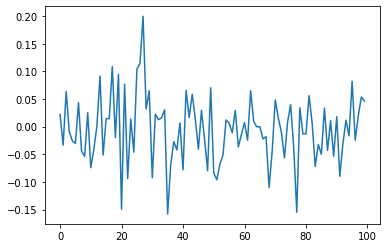

In [17]:
from matplotlib import pyplot
pyplot.plot(svd.components_[:, word_idx])

In [18]:
topic_idx = svd.components_[:, word_idx].argmax()
topic_idx

27

In [19]:
topic = pd.DataFrame({'word': words, 'loading': svd.components_[topic_idx]})
topic.sort_values('loading').tail()

,word,loading
1202,norm,0.119621
804,graph,0.126101
866,image,0.155490
1861,topic,0.199617
1713,sparse,0.211411


# 회전과 결과 해석

In [20]:
!pip install factor_analyzer

You should consider upgrading via the 'C:\Users\82102\anaconda3\python.exe -m pip install --upgrade pip' command.


In [21]:
from factor_analyzer.rotator import Rotator

In [22]:
rotator = Rotator()

In [23]:
svd.components_

array([[ 0.00483864,  0.01243762,  0.004755  , ...,  0.00491457,
         0.0162017 ,  0.01160996],
       [-0.0055402 , -0.01859974, -0.00681511, ...,  0.00074343,
         0.0014955 ,  0.00839796],
       [-0.00331551, -0.02285996, -0.00537686, ..., -0.00103497,
         0.00135762, -0.00786135],
       ...,
       [-0.00037104,  0.02843677,  0.00591093, ...,  0.0027189 ,
         0.01184353, -0.01022713],
       [ 0.00286079, -0.02232737, -0.00742612, ...,  0.00374566,
        -0.00553911, -0.00644252],
       [ 0.00840489,  0.00073834,  0.00954845, ..., -0.00397496,
        -0.00763423, -0.00401217]])

In [24]:
svd.components_.T

array([[ 0.00483864, -0.0055402 , -0.00331551, ..., -0.00037104,
         0.00286079,  0.00840489],
       [ 0.01243762, -0.01859974, -0.02285996, ...,  0.02843677,
        -0.02232737,  0.00073834],
       [ 0.004755  , -0.00681511, -0.00537686, ...,  0.00591093,
        -0.00742612,  0.00954845],
       ...,
       [ 0.00491457,  0.00074343, -0.00103497, ...,  0.0027189 ,
         0.00374566, -0.00397496],
       [ 0.0162017 ,  0.0014955 ,  0.00135762, ...,  0.01184353,
        -0.00553911, -0.00763423],
       [ 0.01160996,  0.00839796, -0.00786135, ..., -0.01022713,
        -0.00644252, -0.00401217]])

In [43]:
rot = rotator.fit_transform(svd.components_.T)

In [44]:
rot.shape

(2000, 100)

In [45]:
loading = rot.T

In [46]:
word_idx = words.index('topic')

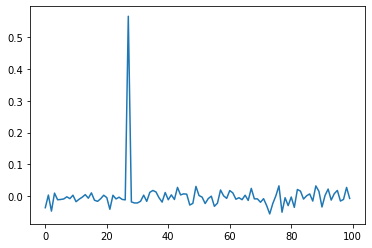

In [47]:
pyplot.plot(loading[:, word_idx])

In [48]:
topic_idx = loading[:, word_idx].argmax()
topic_idx

27

In [49]:
topic = pd.DataFrame({'word': words, 'loading': loading[topic_idx]})
topic.sort_values('loading').tail(10)

,word,loading
1842,text,0.121777
999,latent,0.157819
520,dirichlet,0.187826
540,document,0.192213
1987,word,0.208114
1988,words,0.215588
1003,lda,0.224917
541,documents,0.225140
1862,topics,0.273106
1861,topic,0.566290


In [50]:
doc_topics = svd.transform(x)

In [51]:
doc_topics = doc_topics @ rotator.rotation_
doc_topics

array([[ 0.00986898,  0.0002773 ,  0.03561224, ..., -0.03690456,
        -0.02559526, -0.02864922],
       [ 0.00288644,  0.01226578,  0.12769907, ..., -0.01234438,
        -0.01203736, -0.00448981],
       [ 0.12340451,  0.01002103,  0.02025134, ..., -0.00783088,
         0.02422855,  0.00483857],
       ...,
       [ 0.11219571, -0.03803499,  0.01743923, ...,  0.06894558,
        -0.01892917, -0.01169217],
       [ 0.0280353 , -0.0483438 ,  0.01626323, ...,  0.06461638,
        -0.02805667, -0.02215552],
       [ 0.01069581,  0.03026417, -0.02212655, ..., -0.07714946,
         0.04130162, -0.00665551]])

In [52]:
year_topic = pd.DataFrame({'year': df.year, 'topic': doc_topics[:, topic_idx]})
year_topic.groupby('year').agg('mean')

,topic
year,
2007,0.025189
2008,0.016155
2009,0.019187
2010,0.013317
2011,0.010558
2012,0.016707
2013,0.015346
2014,0.014001
2015,0.009028
